In [1]:
# Basic Imports
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.metrics import mean_squared_error

# Imports for data preprocessing.
from pandas import concat
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# Tensorflow imports
import tensorflow as tf
from tensorflow.keras.layers import Dense, LSTM, BatchNormalization, Dropout
from tensorflow.keras.models import Sequential

In [2]:
# Constants
DATA_FILE_NAME = '../cryptoDataPrediction/final_crypto_data.csv'

In [3]:
df = pd.read_csv(DATA_FILE_NAME, index_col='unix_timestamp')
df

,Unnamed: 0,_id,high_24h,last_24h,bid_24h,vwap_24h,volume_24h,low_24h,ask_24h,open_24h,...,percent_change_1h,percent_change_24h,percent_change_7d,percent_change_30d,percent_change_60d,percent_change_90d,market_cap,market_cap_dominance,fully_diluted_market_cap,reddit_compound_polarity
unix_timestamp,,,,,,,,,,,,,,,,,,,,,
1635527368,0,627127fabbd592fa2c7f25a9,62971.54,62561.13,62559.74,60908.08,5113.537402,56425.0,62561.13,60608.95,...,-0.314446,2.307206,2.108769,26.873643,29.933036,49.972913,1.179682e+12,43.4826,1.313676e+12,0.000834
1635527309,1,627127fabbd592fa2c7f25aa,62971.54,62580.05,62571.40,60907.24,5111.938615,56425.0,62580.05,60608.95,...,-0.422853,2.137546,2.146984,26.873643,29.917416,49.972913,1.179209e+12,43.4826,1.313150e+12,0.000834
1635527428,2,627127fabbd592fa2c7f25ab,62971.54,62591.17,62582.19,60908.89,5115.569587,56425.0,62596.03,60608.95,...,-0.365020,2.383982,2.150485,26.873643,29.997052,49.972913,1.179605e+12,43.4826,1.313590e+12,0.000834
1635527672,3,627127fabbd592fa2c7f25ac,62971.54,62590.43,62572.06,60909.91,5117.061581,56425.0,62590.43,60608.95,...,-0.311393,2.375399,2.464668,26.873643,30.044297,49.972913,1.180352e+12,43.4826,1.314422e+12,0.000834
1635527551,4,627127fabbd592fa2c7f25ad,62971.54,62600.43,62587.09,60909.54,5117.193435,56425.0,62606.26,60608.95,...,-0.379612,2.422122,2.443523,26.873643,30.074340,49.972913,1.180216e+12,43.4826,1.314271e+12,0.000834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1651352348,246786,62712800bbd592fa2c82e9ab,38786.95,38327.07,38304.93,38539.95,566.041421,38160.4,38326.82,38599.30,...,-0.363037,-0.606400,-3.693057,-16.314320,-12.909292,1.689268,7.293839e+11,42.0516,8.050246e+11,0.000800
1651352290,246787,62712800bbd592fa2c82e9ac,38786.95,38332.23,38314.66,38539.96,566.041421,38160.4,38335.17,38599.30,...,-0.344114,-0.592877,-3.713096,-16.308426,-12.839252,1.692403,7.293371e+11,42.0489,8.049729e+11,0.000800
1651352410,246788,62712800bbd592fa2c82e9ad,38786.95,38329.94,38317.93,38539.93,566.041421,38160.4,38330.19,38599.30,...,-0.345789,-0.598362,-3.683293,-16.296175,-12.917047,1.698228,7.294364e+11,42.0546,8.050826e+11,0.000800


In [4]:
# Drop unnecessary columns
df.drop(columns=[
        'Unnamed: 0',
        '_id',
        'high_24h',
        'last_24h',
        'bid_24h',
        'vwap_24h',
        'volume_24h',
        'low_24h',
        'ask_24h',
        'open_24h',
        # 'high_1min',
        # 'volume_1min',
        # 'low_1min',
        # 'close_1min',
        # 'open_1min',
        'max_supply',
        'circulating_supply',
        'total_supply',
        'quote_USD_price',
        'quote_volume_24h',
        'volume_change_24h',
        'percent_change_1h',
        'percent_change_24h',
        'percent_change_7d',
        'percent_change_30d',
        'percent_change_60d',
        'percent_change_90d',
        'market_cap',
        'market_cap_dominance',
        'fully_diluted_market_cap',
        # 'reddit_compound_polarity'
    ], inplace=True)
df

,high_1min,volume_1min,low_1min,close_1min,open_1min,reddit_compound_polarity
unix_timestamp,,,,,,
1635527368,62565.90,1.425169,62539.20,62561.86,62545.45,0.000834
1635527309,62580.05,0.046548,62555.88,62577.47,62555.88,0.000834
1635527428,62597.65,2.112533,62555.02,62597.64,62560.95,0.000834
1635527672,62615.00,0.596406,62590.43,62590.43,62603.62,0.000834
1635527551,62600.43,0.657752,62577.18,62600.43,62577.18,0.000834
...,...,...,...,...,...,...
1651352348,38327.07,0.000650,38327.07,38327.07,38327.07,0.000800
1651352290,38332.23,0.000000,38332.23,38332.23,38332.23,0.000800
1651352410,38317.93,0.007191,38317.93,38317.93,38317.93,0.000800


In [5]:
df = df.reindex(columns = [
	"reddit_compound_polarity",
	"volume_1min",
	"high_1min",
	"low_1min",
	"open_1min",
	"close_1min"
])
df

,reddit_compound_polarity,volume_1min,high_1min,low_1min,open_1min,close_1min
unix_timestamp,,,,,,
1635527368,0.000834,1.425169,62565.90,62539.20,62545.45,62561.86
1635527309,0.000834,0.046548,62580.05,62555.88,62555.88,62577.47
1635527428,0.000834,2.112533,62597.65,62555.02,62560.95,62597.64
1635527672,0.000834,0.596406,62615.00,62590.43,62603.62,62590.43
1635527551,0.000834,0.657752,62600.43,62577.18,62577.18,62600.43
...,...,...,...,...,...,...
1651352348,0.000800,0.000650,38327.07,38327.07,38327.07,38327.07
1651352290,0.000800,0.000000,38332.23,38332.23,38332.23,38332.23
1651352410,0.000800,0.007191,38317.93,38317.93,38317.93,38317.93


In [6]:
# check for null values per column
print("NaN values per column count: \n")
df.isna().sum()

NaN values per column count: 



reddit_compound_polarity    0
volume_1min                 0
high_1min                   0
low_1min                    0
open_1min                   0
close_1min                  0
dtype: int64

In [7]:
values = df.values
# specify columns to plot
groups = [0, 1, 2, 3, 4, 5]
i = 1

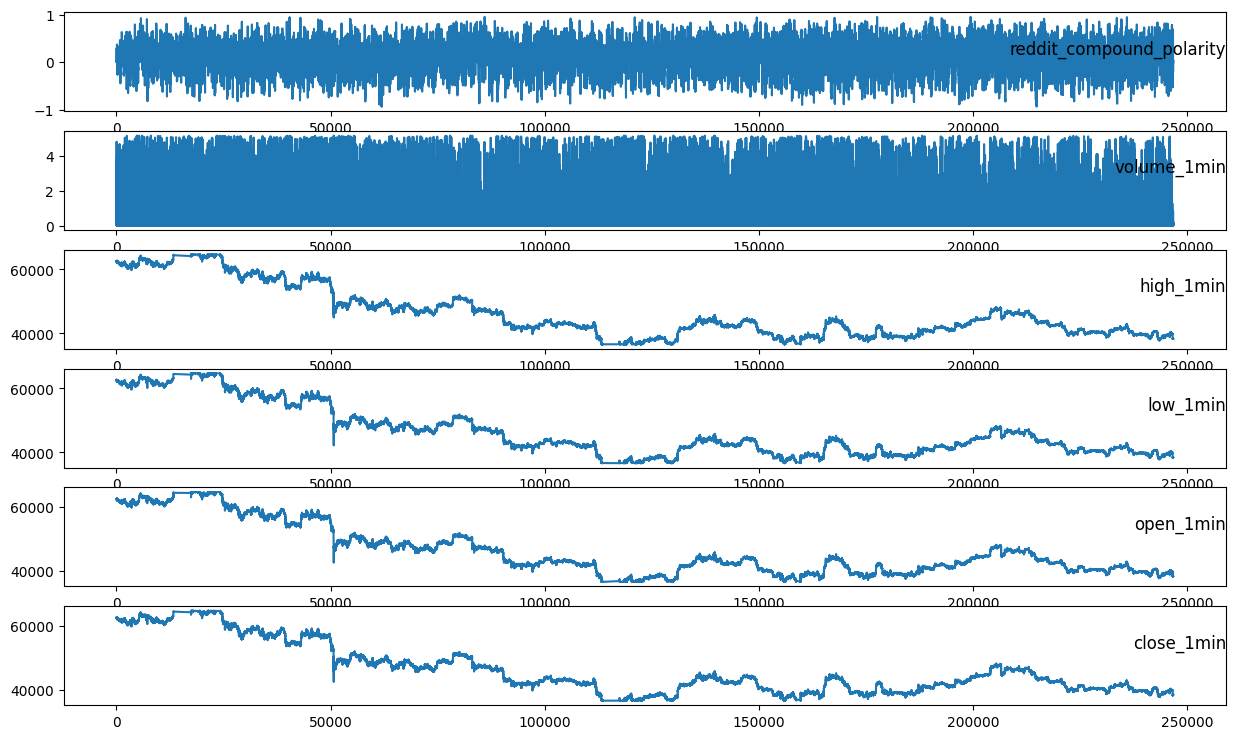

In [8]:
# plot each column
plt.figure(figsize=(15,9))
for group in groups:
	plt.subplot(len(groups), 1, i)
	plt.plot(values[:, group])
	plt.title(df.columns[group], y=0.5, loc='right')
	i += 1
plt.show()

# LSTM Data Preparation

In [9]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True, doPrints=False):
	"""
	:param data: Ta data pou theloume na metasximatisoume se numpy Array
	:param n_in: to plithos ton Lags pou tha exei i input series (X)
	:param n_out: to plithos ton Lags pou tha exei i output series (y)
	:param dropnan: ama theloume na kanoume drop ta nan valuws
	:return: epistrefei tin metasximatismeni lista se multivariate time series.
	"""

	# vreiskei to n_vars
	# an ta data einai list = 1
	# alliws pernei to shape ton data.
	n_vars = 1 if type(data) is list else data.shape[1]

	# kanoume ta data DataFrame
	mDf = pd.DataFrame(data)
	if doPrints:
		print(mDf)

	# ftiaxnei 2 adies listes. mia fia ta
	cols, names = list(), list()
	if doPrints:
		print(n_vars)

	# ftiaxnoume to input series X. (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		# kanoume append sto cols to dataframe olistimeno kata i rows
		cols.append(mDf.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]

	# ftiaxnoume to forecast sequence y (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(mDf.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]

	if doPrints:
		print(cols)
		print(names)

	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [10]:
# get dataframe values.
values = df.values
values

array([[8.33660422e-04, 1.42516865e+00, 6.25659000e+04, 6.25392000e+04,
        6.25454500e+04, 6.25618600e+04],
       [8.33660422e-04, 4.65481700e-02, 6.25800500e+04, 6.25558800e+04,
        6.25558800e+04, 6.25774700e+04],
       [8.33660422e-04, 2.11253286e+00, 6.25976500e+04, 6.25550200e+04,
        6.25609500e+04, 6.25976400e+04],
       ...,
       [8.00273973e-04, 7.19140000e-03, 3.83179300e+04, 3.83179300e+04,
        3.83179300e+04, 3.83179300e+04],
       [8.00273973e-04, 0.00000000e+00, 3.83447900e+04, 3.83447900e+04,
        3.83447900e+04, 3.83447900e+04],
       [8.00273973e-04, 1.85617000e-01, 3.83395400e+04, 3.83395400e+04,
        3.83395400e+04, 3.83395400e+04]])

# Normalize Dataframe Values.

In [11]:
# Ensure all data are float.
values = values.astype('float32')
values

array([[8.3366042e-04, 1.4251686e+00, 6.2565898e+04, 6.2539199e+04,
        6.2545449e+04, 6.2561859e+04],
       [8.3366042e-04, 4.6548169e-02, 6.2580051e+04, 6.2555879e+04,
        6.2555879e+04, 6.2577469e+04],
       [8.3366042e-04, 2.1125329e+00, 6.2597648e+04, 6.2555020e+04,
        6.2560949e+04, 6.2597641e+04],
       ...,
       [8.0027396e-04, 7.1914000e-03, 3.8317930e+04, 3.8317930e+04,
        3.8317930e+04, 3.8317930e+04],
       [8.0027396e-04, 0.0000000e+00, 3.8344789e+04, 3.8344789e+04,
        3.8344789e+04, 3.8344789e+04],
       [8.0027396e-04, 1.8561700e-01, 3.8339539e+04, 3.8339539e+04,
        3.8339539e+04, 3.8339539e+04]], dtype=float32)

In [12]:
# Normalize Continues Features.
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_values = scaler.fit_transform(values)
scaled_values

array([[0.4978444 , 0.27705094, 0.9250517 , 0.9248632 , 0.9246783 ,
        0.9253454 ],
       [0.4978444 , 0.0090489 , 0.92555547, 0.9254569 , 0.92504954,
        0.9259012 ],
       [0.4978444 , 0.41067365, 0.9261818 , 0.92542636, 0.92523   ,
        0.92661905],
       ...,
       [0.49782678, 0.001398  , 0.06199479, 0.06271124, 0.06228316,
        0.06229508],
       [0.49782678, 0.        , 0.06295073, 0.0636673 , 0.06323922,
        0.06325126],
       [0.49782678, 0.0360837 , 0.06276393, 0.0634805 , 0.0630523 ,
        0.06306434]], dtype=float32)

In [13]:
# specify the number of lag hours
n_hours = 10
n_features = 6
n_obs = n_hours * n_features

In [14]:
# prepare data for lstm
reframed = series_to_supervised(scaled_values, n_in=n_hours,n_out=1)
reframed

,var1(t-10),var2(t-10),var3(t-10),var4(t-10),var5(t-10),var6(t-10),var1(t-9),var2(t-9),var3(t-9),var4(t-9),...,var3(t-1),var4(t-1),var5(t-1),var6(t-1),var1(t),var2(t),var3(t),var4(t),var5(t),var6(t)
10,0.497844,0.277051,0.925052,0.924863,0.924678,0.925345,0.497844,0.009049,0.925555,0.925457,...,0.927272,0.926333,0.926929,0.926089,0.497806,0.396208,0.927222,0.925517,0.925122,0.927659
11,0.497844,0.009049,0.925555,0.925457,0.925050,0.925901,0.497844,0.410674,0.926182,0.925426,...,0.927222,0.925517,0.925122,0.927659,0.497806,0.300064,0.926409,0.921720,0.923841,0.925044
12,0.497844,0.410674,0.926182,0.925426,0.925230,0.926619,0.497845,0.115941,0.926800,0.926687,...,0.926409,0.921720,0.923841,0.925044,0.497846,0.203921,0.924407,0.924023,0.923615,0.924044
13,0.497845,0.115941,0.926800,0.926687,0.926749,0.926363,0.497845,0.127866,0.926281,0.926215,...,0.924407,0.924023,0.923615,0.924044,0.497404,0.121956,0.927667,0.927041,0.926723,0.927996
14,0.497845,0.127866,0.926281,0.926215,0.925808,0.926718,0.497845,0.201259,0.926382,0.926892,...,0.927667,0.927041,0.926723,0.927996,0.497806,0.304405,0.927724,0.925746,0.925639,0.927521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246786,0.497826,0.000130,0.063320,0.064036,0.063608,0.063620,0.519428,0.000000,0.062738,0.063454,...,0.062229,0.062945,0.062517,0.062529,0.497827,0.000126,0.062320,0.063037,0.062608,0.062620
246787,0.519428,0.000000,0.062738,0.063454,0.063026,0.063038,0.497827,0.000000,0.063170,0.063887,...,0.062320,0.063037,0.062608,0.062620,0.497827,0.000000,0.062504,0.063220,0.062792,0.062804
246788,0.497827,0.000000,0.063170,0.063887,0.063459,0.063471,0.497827,0.000387,0.063342,0.064059,...,0.062504,0.063220,0.062792,0.062804,0.497827,0.001398,0.061995,0.062711,0.062283,0.062295
246789,0.497827,0.000387,0.063342,0.064059,0.063630,0.063643,0.497827,0.000972,0.061499,0.062216,...,0.061995,0.062711,0.062283,0.062295,0.497827,0.000000,0.062951,0.063667,0.063239,0.063251


# Define And Fit Model

In [15]:
def train_test_valid_split(total_x, total_y, train_size=0.8, valid_size=0.1) :
    train_index = int(len(total_x) * train_size)
    valid_index = int(len(total_x) * valid_size)

    X_train, y_train = total_x[0 :train_index], total_y[0 :train_index]
    X_valid, y_valid = total_x[train_index :train_index + valid_index], total_y[train_index :train_index + valid_index]
    X_test, y_test = total_x[train_index + valid_index :], total_y[train_index + valid_index :]

    print("-------- train test valid split --------")
    print(len(X_train)), print(len(y_train))
    print(len(X_valid)), print(len(y_valid))
    print(len(X_test)), print(len(y_test))
    print("----------------------------------------")

    return np.array(X_train), \
           np.array(y_train), \
           np.array(X_valid), \
           np.array(y_valid), \
           np.array(X_test), \
           np.array(y_test)

In [16]:
# split into train and test sets
values = reframed.values
cutoff = round(0.70 * len(values))
values = values[cutoff:,:]
values

array([[7.01514244e-01, 2.33278450e-04, 1.02676392e-01, ...,
        9.89218950e-02, 9.88793373e-02, 9.85095501e-02],
       [7.01514244e-01, 3.38253740e-04, 1.01626396e-01, ...,
        9.94690657e-02, 9.90418196e-02, 9.90567207e-02],
       [7.01514244e-01, 2.33278450e-04, 1.01733208e-01, ...,
        9.98177528e-02, 9.98715162e-02, 9.94055271e-02],
       ...,
       [4.97826785e-01, 0.00000000e+00, 6.31704330e-02, ...,
        6.27112389e-02, 6.22831583e-02, 6.22950792e-02],
       [4.97826785e-01, 3.86853411e-04, 6.33419752e-02, ...,
        6.36672974e-02, 6.32392168e-02, 6.32512569e-02],
       [4.97826785e-01, 9.72329755e-04, 6.14993572e-02, ...,
        6.34804964e-02, 6.30522966e-02, 6.30643368e-02]], dtype=float32)

In [17]:
X =  values[:,:n_obs]
X

array([[7.01514244e-01, 2.33278450e-04, 1.02676392e-01, ...,
        1.00358486e-01, 9.99832153e-02, 9.99462605e-02],
       [7.01514244e-01, 3.38253740e-04, 1.01626396e-01, ...,
        9.89218950e-02, 9.88793373e-02, 9.85095501e-02],
       [7.01514244e-01, 2.33278450e-04, 1.01733208e-01, ...,
        9.94690657e-02, 9.90418196e-02, 9.90567207e-02],
       ...,
       [4.97826785e-01, 0.00000000e+00, 6.31704330e-02, ...,
        6.32202625e-02, 6.27921820e-02, 6.28041029e-02],
       [4.97826785e-01, 3.86853411e-04, 6.33419752e-02, ...,
        6.27112389e-02, 6.22831583e-02, 6.22950792e-02],
       [4.97826785e-01, 9.72329755e-04, 6.14993572e-02, ...,
        6.36672974e-02, 6.32392168e-02, 6.32512569e-02]], dtype=float32)

In [18]:
y = values[:,-1]
y

array([0.09850955, 0.09905672, 0.09940553, ..., 0.06229508, 0.06325126,
       0.06306434], dtype=float32)

In [19]:
train_X, train_y, valid_X, valid_y, _, _ = train_test_valid_split(
	X,
	y,
	train_size=0.8,
	valid_size=0.1
)
print("----------------------------")
print(f"-------- Train X: {train_X.shape}, Train y: {train_y.shape} --------")
print(f"-------- Valid X: {valid_X.shape}, Valid y: {valid_y.shape} --------")
# print(f"-------- Test X: {test_X.shape}, Test y: {test_y.shape} --------")
print("----------------------------\n")

-------- train test valid split --------
59227
59227
7403
7403
7404
7404
----------------------------------------
----------------------------
-------- Train X: (59227, 60), Train y: (59227,) --------
-------- Valid X: (7403, 60), Valid y: (7403,) --------
----------------------------



In [20]:
train_X

array([[7.01514244e-01, 2.33278450e-04, 1.02676392e-01, ...,
        1.00358486e-01, 9.99832153e-02, 9.99462605e-02],
       [7.01514244e-01, 3.38253740e-04, 1.01626396e-01, ...,
        9.89218950e-02, 9.88793373e-02, 9.85095501e-02],
       [7.01514244e-01, 2.33278450e-04, 1.01733208e-01, ...,
        9.94690657e-02, 9.90418196e-02, 9.90567207e-02],
       ...,
       [4.97404426e-01, 8.06754548e-03, 1.42594337e-01, ...,
        1.42207742e-01, 1.41781449e-01, 1.43355966e-01],
       [8.40229034e-01, 0.00000000e+00, 1.44197345e-01, ...,
        1.44198537e-01, 1.43772364e-01, 1.44389033e-01],
       [4.97404426e-01, 8.02502129e-03, 1.42053604e-01, ...,
        1.43059850e-01, 1.44021153e-01, 1.43004179e-01]], dtype=float32)

In [21]:
valid_X

array([[0.49740443, 0.12081418, 0.1409545 , ..., 0.14804673, 0.14762056,
        0.14763951],
       [0.49740443, 0.15898752, 0.13864708, ..., 0.14104068, 0.14061439,
        0.14063275],
       [0.49740443, 0.        , 0.1407026 , ..., 0.14273775, 0.14231157,
        0.14233005],
       ...,
       [0.50488997, 0.00070956, 0.10495114, ..., 0.10535681, 0.10492969,
        0.10569119],
       [0.5055705 , 0.00510297, 0.11443496, ..., 0.10609221, 0.10566509,
        0.10568058],
       [0.50488997, 0.        , 0.10437107, ..., 0.10609221, 0.10566509,
        0.10568058]], dtype=float32)

In [22]:
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], n_hours, n_features))
valid_X = valid_X.reshape((valid_X.shape[0], n_hours, n_features))
print(train_X.shape, train_y.shape, valid_X.shape, valid_y.shape)

(59227, 10, 6) (59227,) (7403, 10, 6) (7403,)


In [23]:
 # Network Configurations
EPOCHS = 100
BATCH_SIZE = 32

In [24]:
# design network
model = Sequential()
model.add(LSTM(
	2 * BATCH_SIZE,
	return_sequences=True,
	activation='relu',
	# unroll=True,
	input_shape=(train_X.shape[1], train_X.shape[2]),
))
model.add(LSTM(
	BATCH_SIZE,
	activation='relu',
	# unroll=True,
))
# model.add(Dense(BATCH_SIZE))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='mse')

2022-10-08 14:49:16.775732: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [25]:
# fit network
history = model.fit(
	train_X,
	train_y,
	epochs=EPOCHS,
	batch_size=BATCH_SIZE,
	validation_data=(valid_X, valid_y),
	verbose=2,
	shuffle=False
)

2022-10-08 14:49:17.120438: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
1851/1851 - 12s - loss: 0.0487 - val_loss: 0.0234
Epoch 2/100
1851/1851 - 9s - loss: 4.3108e-04 - val_loss: 0.0022
Epoch 3/100
1851/1851 - 9s - loss: 2.5394e-04 - val_loss: 0.0028
Epoch 4/100
1851/1851 - 9s - loss: 2.8398e-04 - val_loss: 0.0036
Epoch 5/100
1851/1851 - 9s - loss: 3.0197e-04 - val_loss: 0.0040
Epoch 6/100
1851/1851 - 10s - loss: 3.3763e-04 - val_loss: 0.0045
Epoch 7/100
1851/1851 - 10s - loss: 3.6863e-04 - val_loss: 0.0044
Epoch 8/100
1851/1851 - 9s - loss: 3.8233e-04 - val_loss: 0.0041
Epoch 9/100
1851/1851 - 9s - loss: 3.6551e-04 - val_loss: 0.0037
Epoch 10/100
1851/1851 - 9s - loss: 3.1584e-04 - val_loss: 0.0029
Epoch 11/100
1851/1851 - 9s - loss: 2.5523e-04 - val_loss: 0.0017
Epoch 12/100
1851/1851 - 9s - loss: 1.8629e-04 - val_loss: 6.3681e-04
Epoch 13/100
1851/1851 - 11s - loss: 1.4481e-04 - val_loss: 3.7259e-04
Epoch 14/100
1851/1851 - 11s - loss: 1.3424e-04 - val_loss: 2.0733e-04
Epoch 15/100
1851/1851 - 9s - loss: 1.2032e-04 - val_loss: 1.2354e-04
Ep

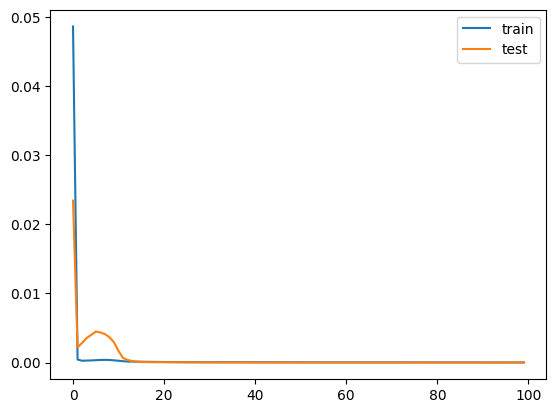

In [26]:
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [27]:
# make a prediction
yhat = model.predict(valid_X)
valid_X = valid_X.reshape((valid_X.shape[0], n_hours*n_features))
valid_X

array([[0.49740443, 0.12081418, 0.1409545 , ..., 0.14804673, 0.14762056,
        0.14763951],
       [0.49740443, 0.15898752, 0.13864708, ..., 0.14104068, 0.14061439,
        0.14063275],
       [0.49740443, 0.        , 0.1407026 , ..., 0.14273775, 0.14231157,
        0.14233005],
       ...,
       [0.50488997, 0.00070956, 0.10495114, ..., 0.10535681, 0.10492969,
        0.10569119],
       [0.5055705 , 0.00510297, 0.11443496, ..., 0.10609221, 0.10566509,
        0.10568058],
       [0.50488997, 0.        , 0.10437107, ..., 0.10609221, 0.10566509,
        0.10568058]], dtype=float32)

In [28]:
valid_X.shape

(7403, 60)

In [29]:
yhat

array([[0.14516118],
       [0.14154845],
       [0.14151186],
       ...,
       [0.10693929],
       [0.10685152],
       [0.10685652]], dtype=float32)

In [30]:
valid_y.reshape((len(valid_y), 1))

array([[0.14063275],
       [0.14233005],
       [0.14339972],
       ...,
       [0.10568058],
       [0.10568058],
       [0.10589266]], dtype=float32)

In [31]:
valid_X[:, -(n_features-1):]

array([[0.        , 0.14732563, 0.14804673, 0.14762056, 0.14763951],
       [0.        , 0.14031994, 0.14104068, 0.14061439, 0.14063275],
       [0.        , 0.142017  , 0.14273775, 0.14231157, 0.14233005],
       ...,
       [0.00288488, 0.10538399, 0.10535681, 0.10492969, 0.10569119],
       [0.00224919, 0.10537338, 0.10609221, 0.10566509, 0.10568058],
       [0.        , 0.10537338, 0.10609221, 0.10566509, 0.10568058]],
      dtype=float32)

In [32]:
# invert scaling for forecast
inv_yhat = np.concatenate((valid_X[:, -(n_features-1):], yhat), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,-1]

In [33]:
# invert scaling for actual
test_y = valid_y.reshape((len(valid_y), 1))
inv_y = np.concatenate((valid_X[:, -(n_features-1):], test_y), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,-1]

In [34]:
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 69.526
